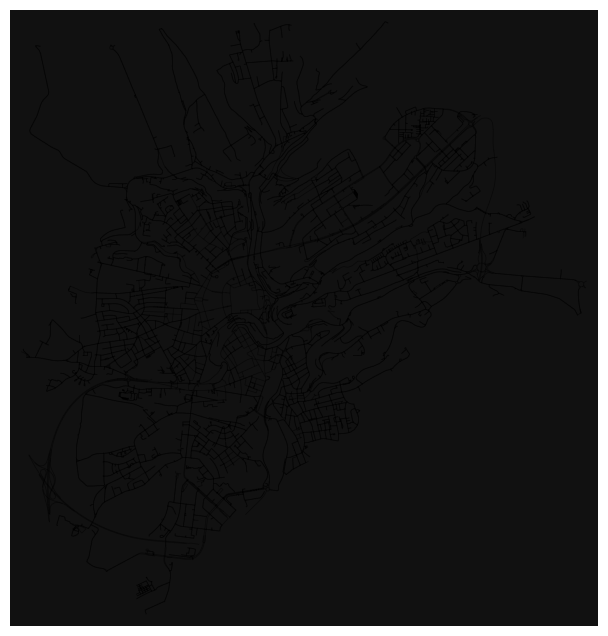

<Figure size 640x480 with 0 Axes>

In [1]:
import osmnx as ox
import matplotlib.pyplot as plt

# Define the location and network type
place_name = "Luxembourg City"
network_type = "drive_service"

# Download and visualize the street network
G = ox.graph_from_place(place_name, network_type=network_type)
fig, ax = ox.plot_graph(G, node_size=0, edge_color="k", edge_linewidth=0.5, edge_alpha=0.5)

# Add labels for each service road
for u, v, data in G.edges(data=True):
    if "service" in data["highway"]:
        x = (G.nodes[u]["x"] + G.nodes[v]["x"]) / 2
        y = (G.nodes[u]["y"] + G.nodes[v]["y"]) / 2
        label = data["name"] if "name" in data else ""
        ax.annotate(label, xy=(x, y), fontsize=6, ha="center", va="center")

# Remove the axis ticks and save the figure
ax.set_xticks([])
ax.set_yticks([])
plt.savefig("luxembourg_drive_service.png", dpi=300, bbox_inches="tight")
plt.show()


KeyError: 'railway'

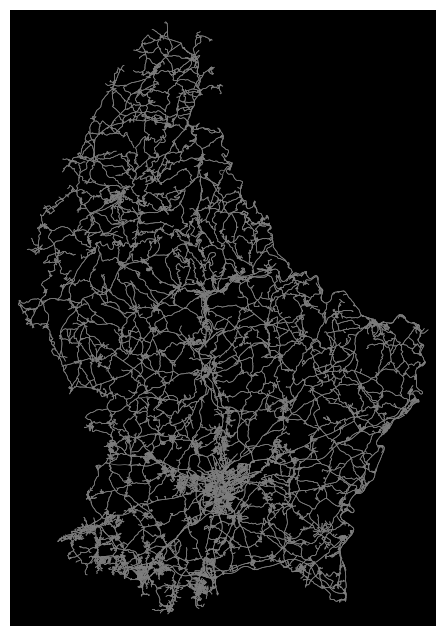

In [3]:
import osmnx as ox
import matplotlib.pyplot as plt

place = 'Luxembourg'
G = ox.graph_from_place(place, network_type='drive_service')
fig, ax = ox.plot_graph(G, node_size=0, edge_linewidth=0.5, edge_color='gray', bgcolor='k', show=False, close=False)

# plot rail edges with white color
rail_edges = ox.graph_to_gdfs(G, nodes=False, edges=True)
rail_edges = rail_edges[rail_edges['railway'].notnull()]
ox.plot.plot_graph(ax, rail_edges, edge_color='white', edge_linewidth=1.5)


# add labels for each service
for service in ['motorway', 'trunk', 'primary', 'secondary', 'tertiary', 'residential', 'service']:
    service_edges = ox.graph_to_gdfs(G, nodes=False, edges=True)
    service_edges = service_edges[service_edges['highway'] == service]
    if not service_edges.empty:
        ox.plot.plot_graph(ax, service_edges, edge_color='w', edge_linewidth=1, edge_alpha=1, node_size=0, edge_zorder=10)
        ax.text(service_edges.iloc[0]['u'], service_edges.iloc[0]['v'], service, fontsize=10, color='w')

plt.show()
